In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from descartes import PolygonPatch
import imageio

datafile = 'lab_ratio.csv'
shapefile = '../Resources/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp'

colors = 9
cmap = 'Blues'
figsize = (16, 10)

ImportError: dlopen(/anaconda3/envs/PythonData/lib/python3.6/site-packages/fiona/ogrext.cpython-36m-darwin.so, 2): Library not loaded: @rpath/libncurses.6.dylib
  Referenced from: /anaconda3/envs/PythonData/lib/libspatialite.7.dylib
  Reason: image not found

In [20]:
gdf = gpd.read_file(shapefile)[['ADM0_A3', 'geometry']].to_crs('+proj=robin')
gdf.head()

ADM0_A3                                           geometry
0     IDN  (POLYGON ((11108970.26020776 445285.1302330397...
1     MYS  (POLYGON ((11108970.26020776 445285.1302330397...
2     CHL  (POLYGON ((-6477059.899247097 -1872360.8384665...
3     BOL  POLYGON ((-6477059.899247097 -1872360.83846657...
4     PER  (POLYGON ((-6477059.899247097 -1872360.8384665...

In [21]:
labor_df = pd.read_csv(datafile)
merged = gdf.merge(labor_df, left_on='ADM0_A3', right_on='Country Code')
merged.head()

ADM0_A3                                           geometry Country Code  \
0     IDN  (POLYGON ((11108970.26020776 445285.1302330397...          IDN   
1     MYS  (POLYGON ((11108970.26020776 445285.1302330397...          MYS   
2     CHL  (POLYGON ((-6477059.899247097 -1872360.8384665...          CHL   
3     BOL  POLYGON ((-6477059.899247097 -1872360.83846657...          BOL   
4     PER  (POLYGON ((-6477059.899247097 -1872360.8384665...          PER   

       1990      1991      1992      1993      1994      1995      1996  \
0  0.540758  0.565741  0.590923  0.591202  0.591601  0.592105  0.592535   
1  0.576568  0.575570  0.574790  0.574117  0.573564  0.573109  0.572851   
2  0.416894  0.414102  0.438525  0.454573  0.455485  0.446351  0.454894   
3  0.682769  0.686938  0.690548  0.695095  0.699902  0.704741  0.709030   
4  0.582905  0.587375  0.591464  0.596711  0.602936  0.641662  0.669415   

     ...         2008      2009      2010      2011      2012      2013  \
0    ...     0.608011  0.606097  0.617857  0.612392  0.606925  0.601439   
1    ...     0.564320  0.572494  0.570733  0.587093  0.599633  0.631502   
2    ...     0.580328  0.592100  0.627696  0.648501  0.654519  0.662156   
3    ...     0.758975  0.761850  0.755914  0.750892  0.724186  0.736039   
4    ...     0.815849  0.816228  0.834954  0.828546  0.827069  0.826709   

       2014      2015      2016      2017  
0  0.602594  0.590928  0.619396  0.620229  
1  0.646651  0.650385  0.655915  0.656711  
2  0.671183  0.669508  0.677380  0.679692  
3  0.744399  0.683554  0.689180  0.690598  
4  0.820613  0.808166  0.813839  0.816912  

[5 rows x 31 columns]

/anaconda3/envs/gwarl/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


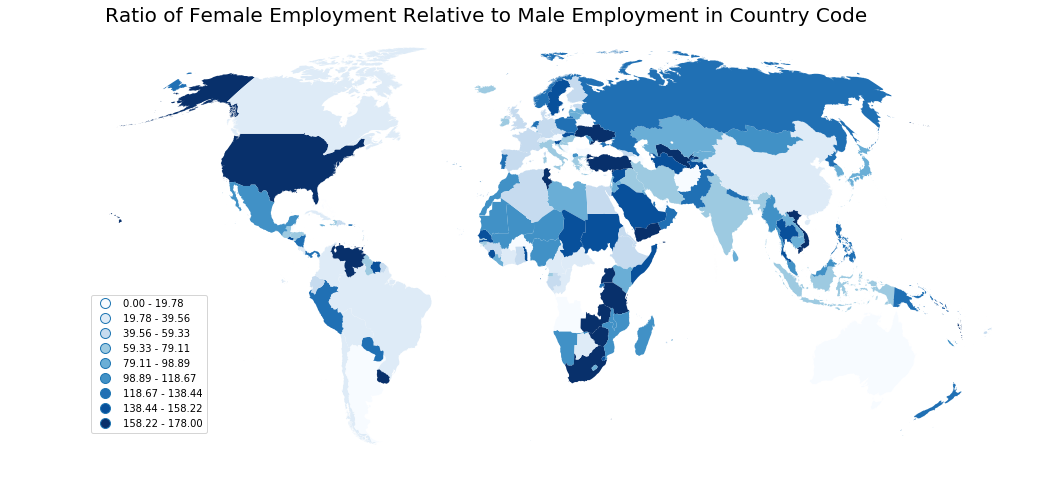

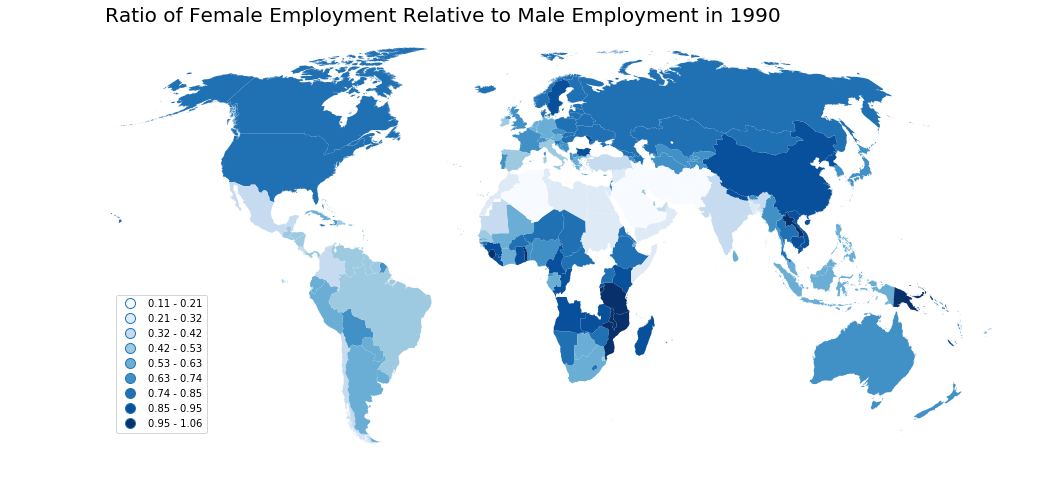

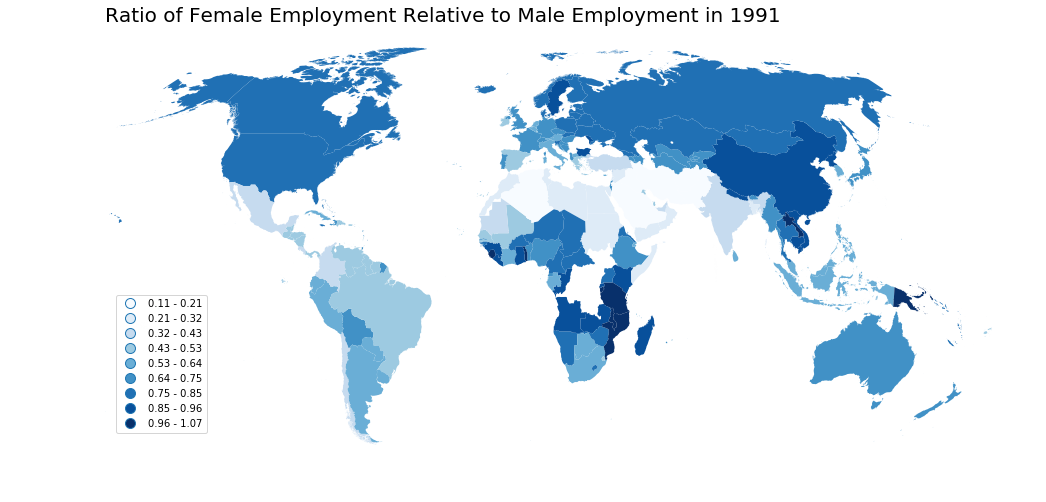

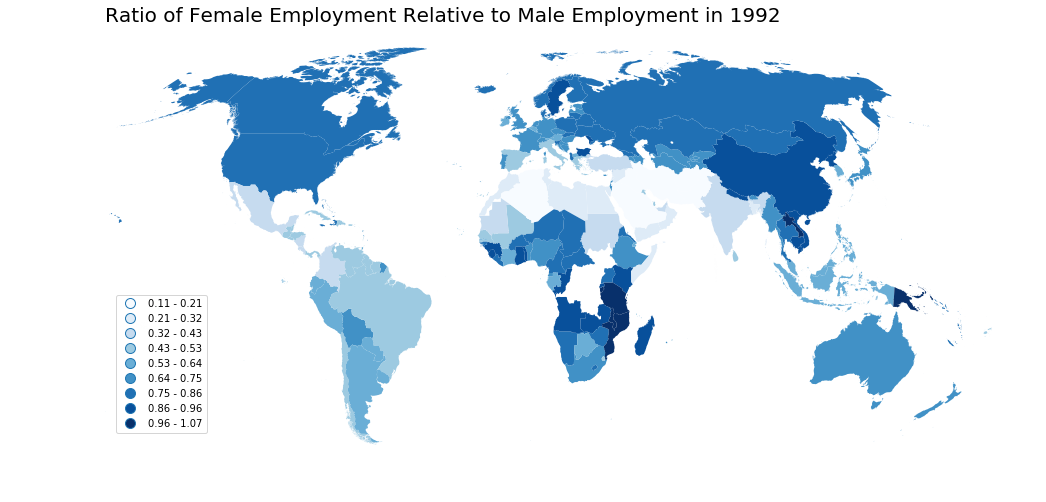

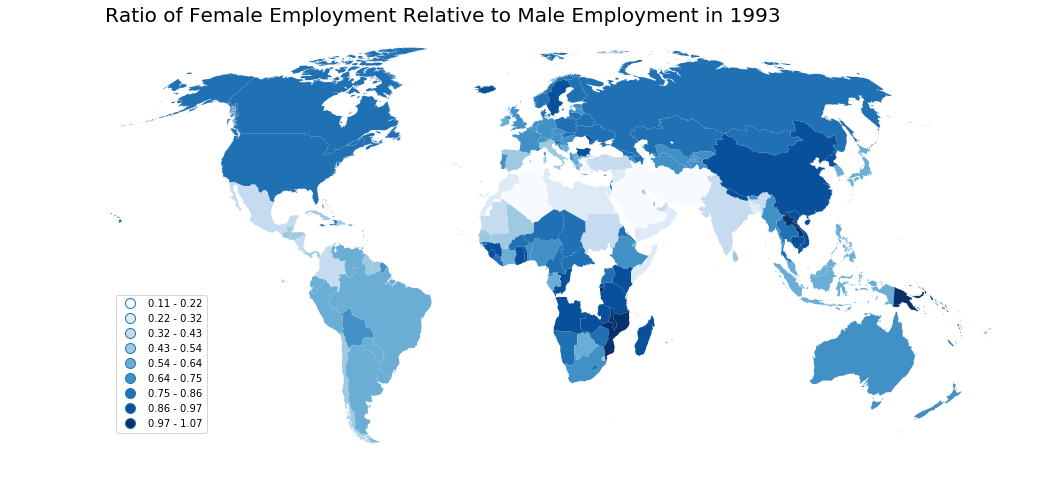

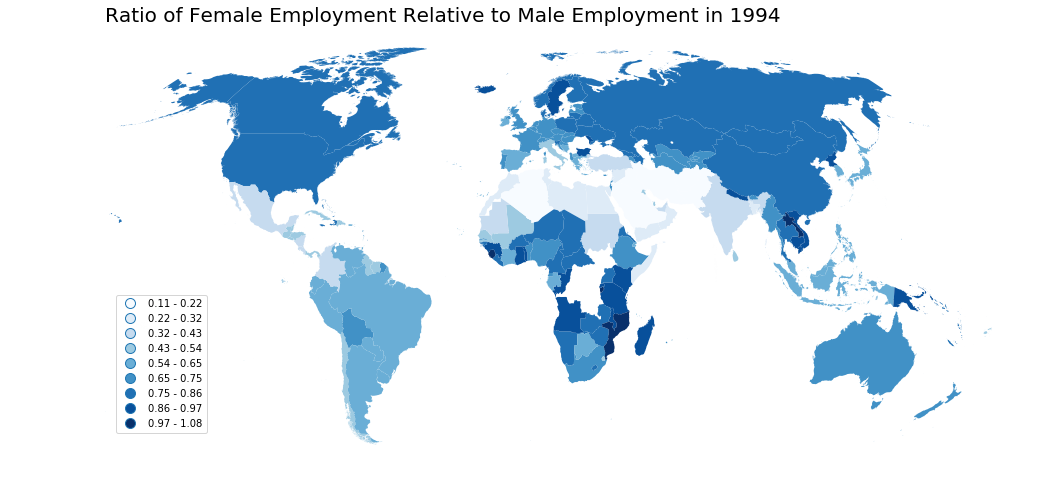

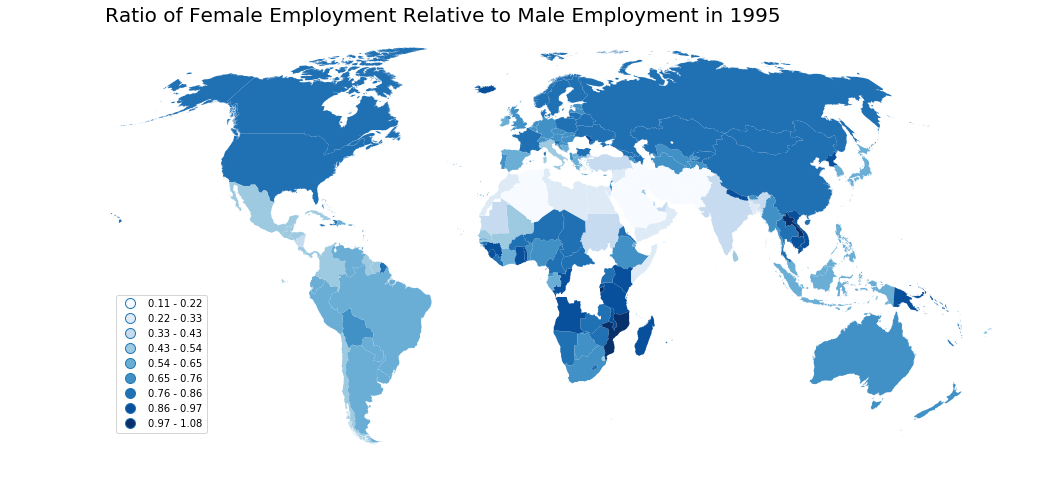

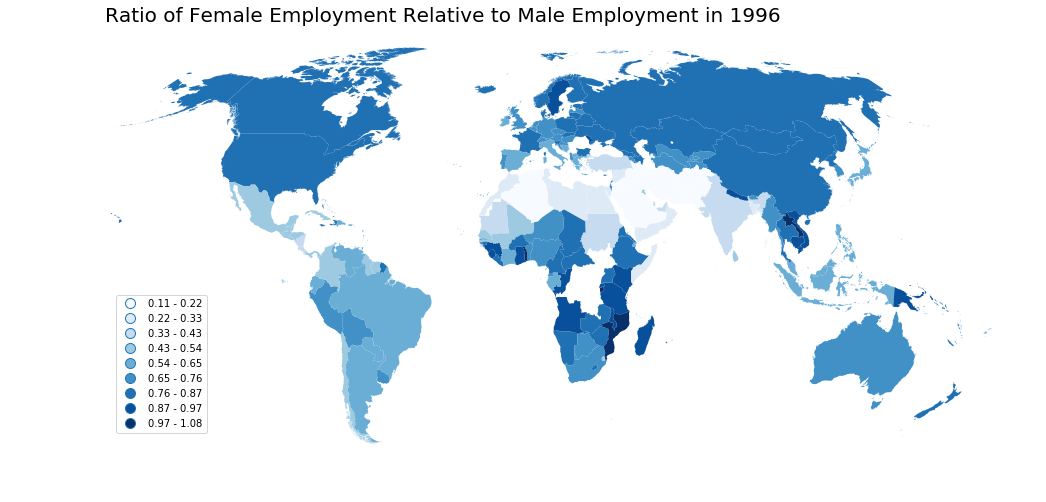

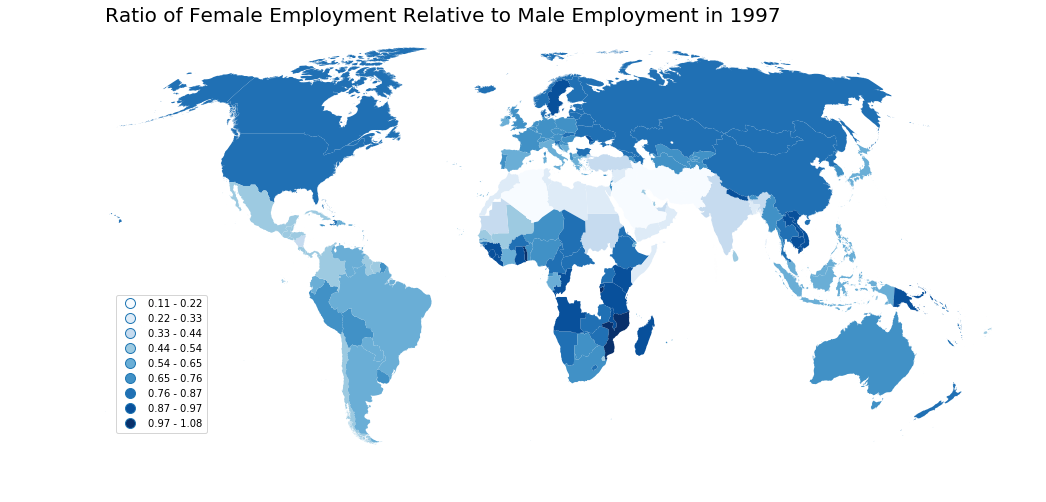

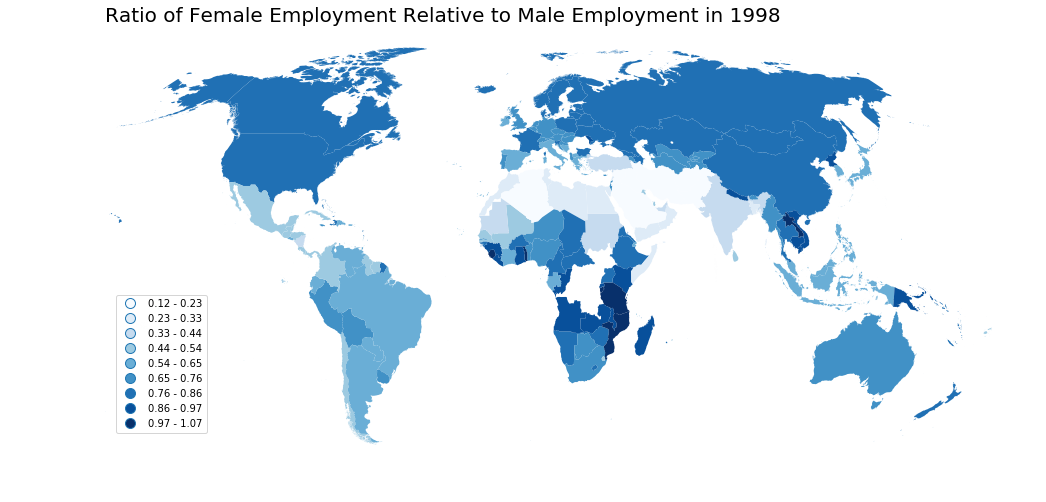

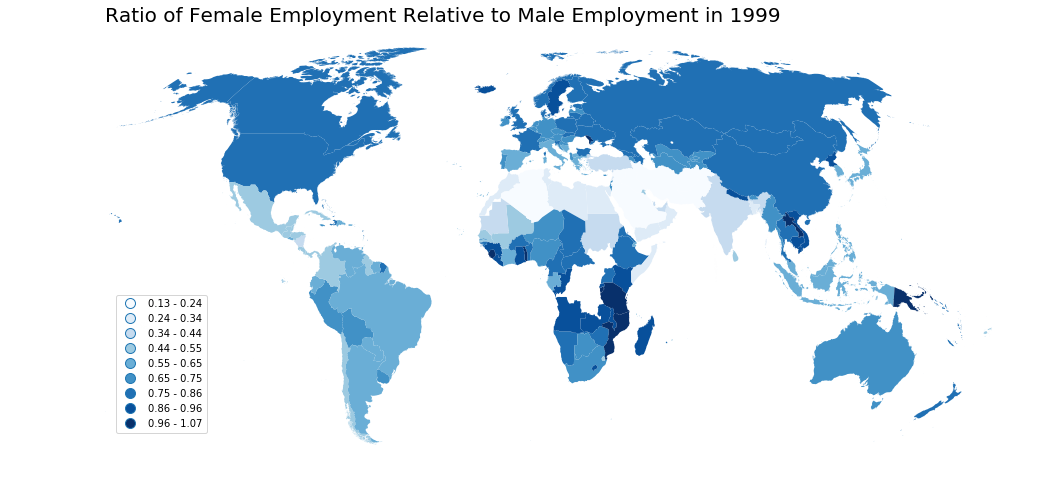

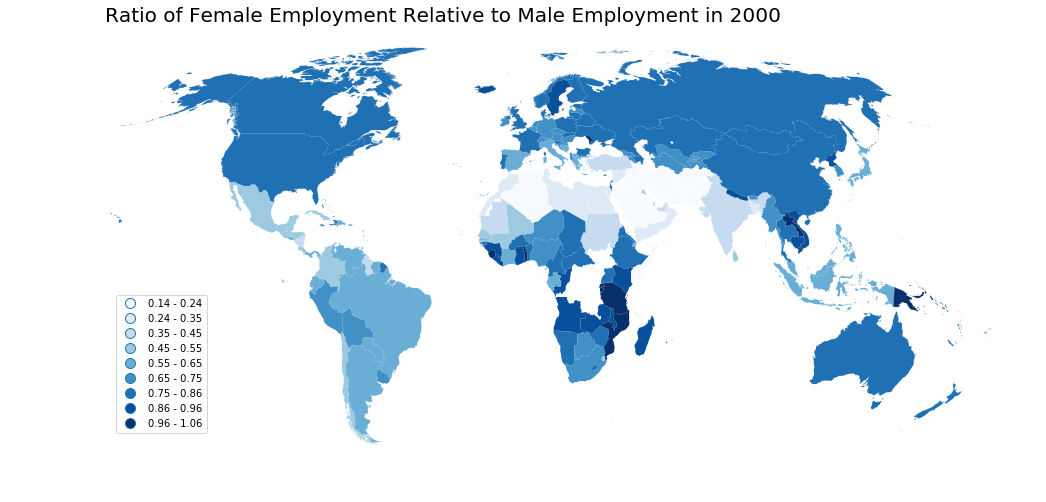

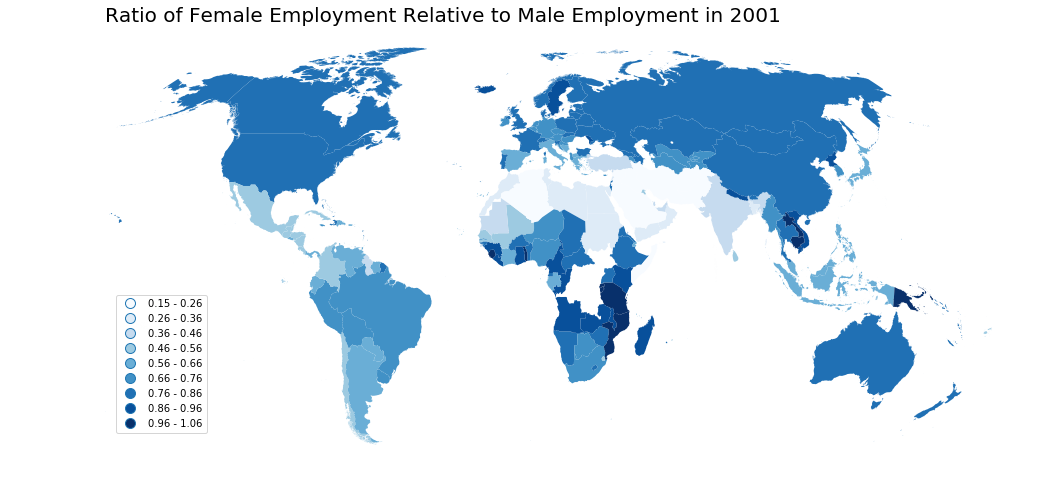

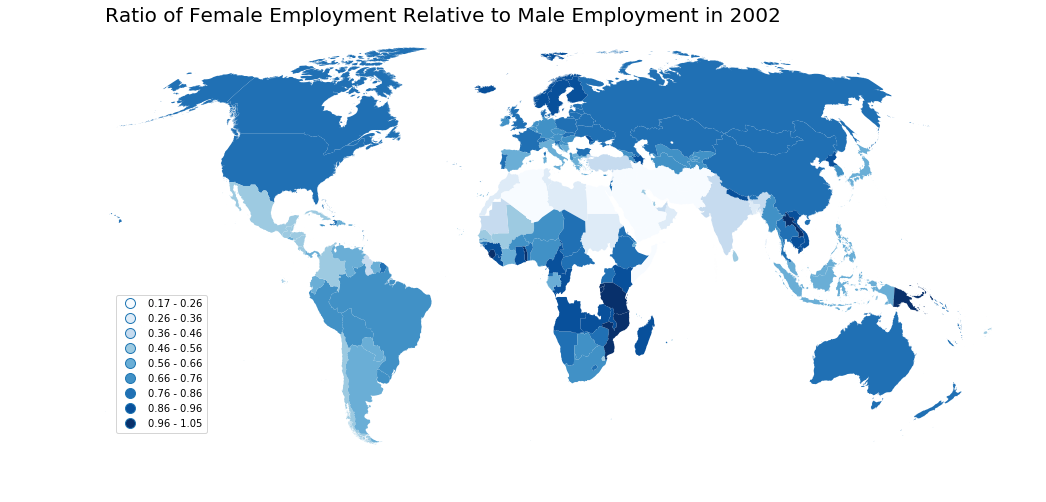

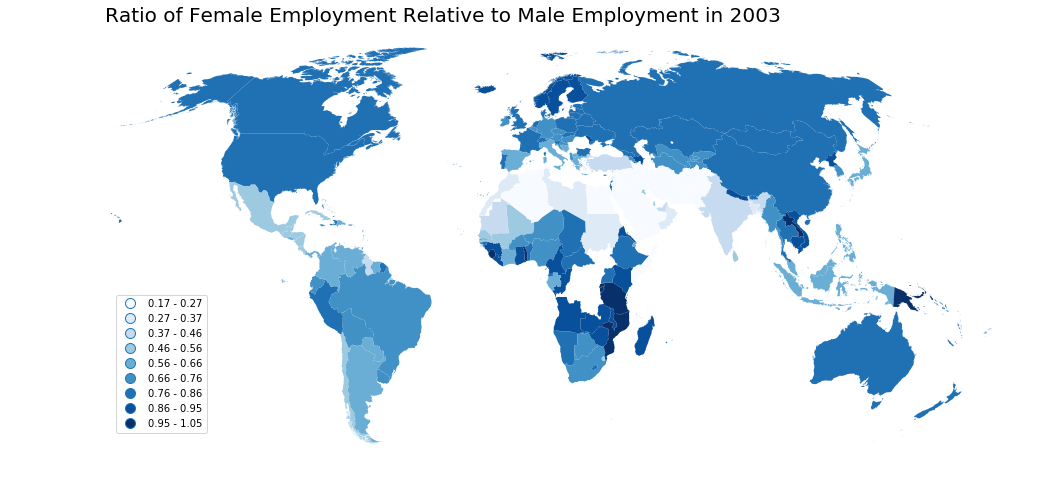

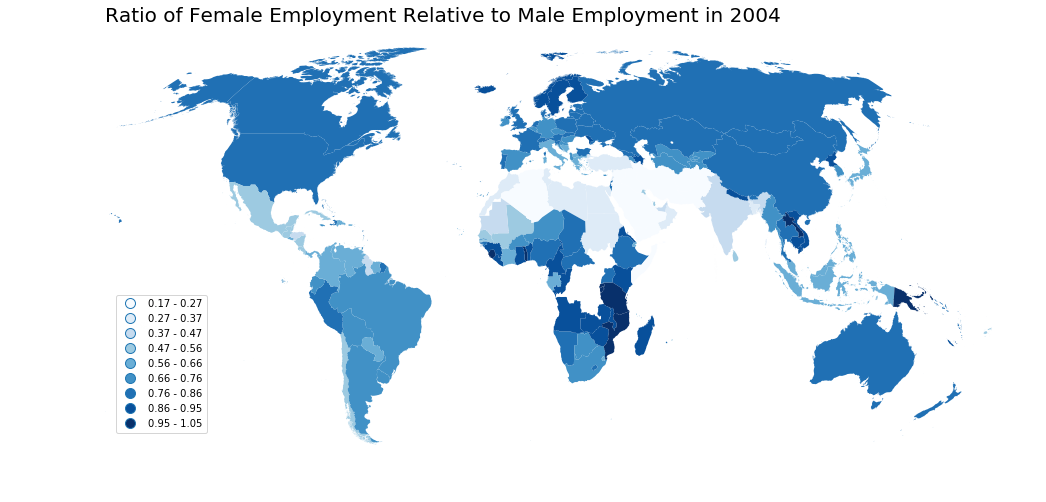

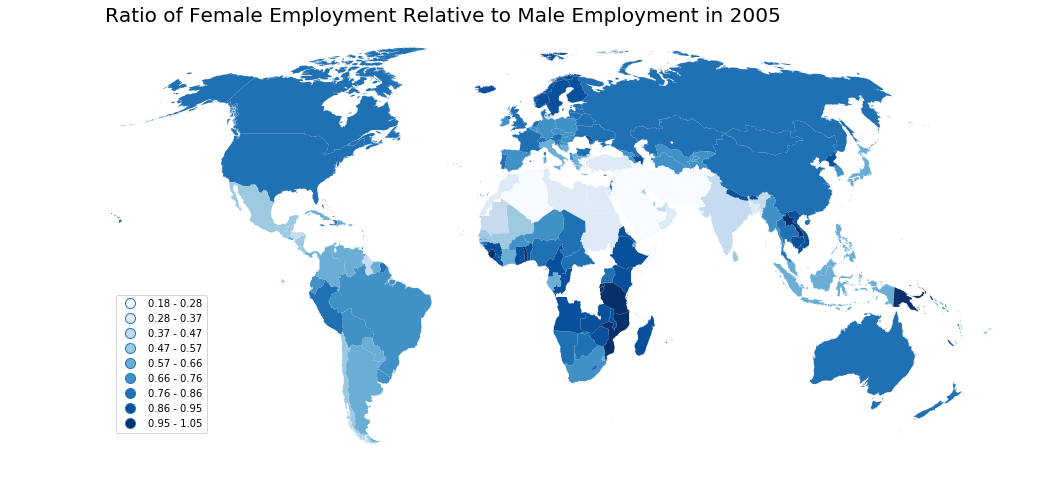

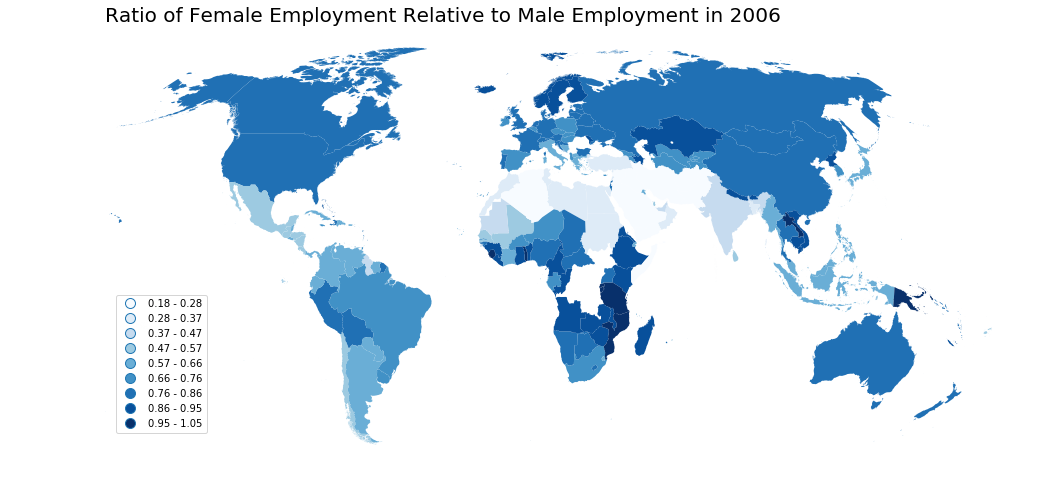

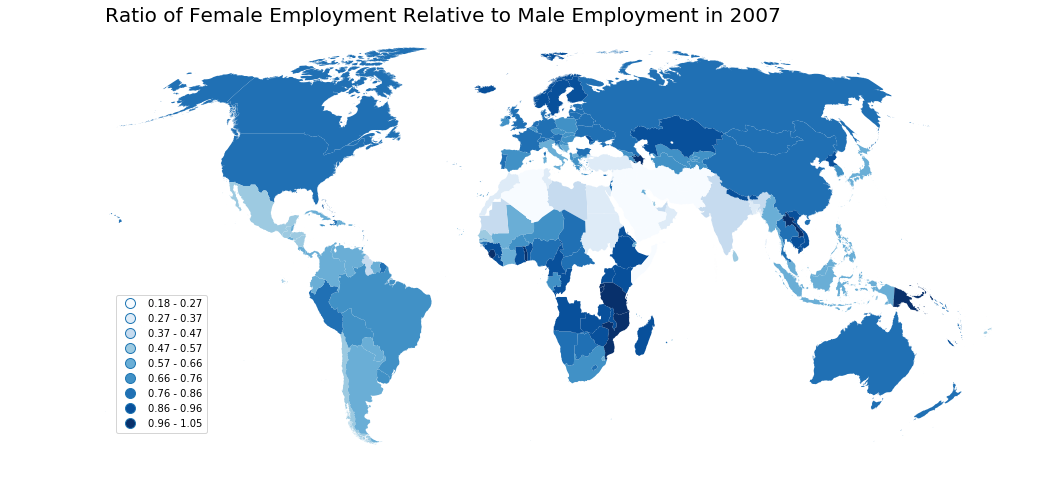

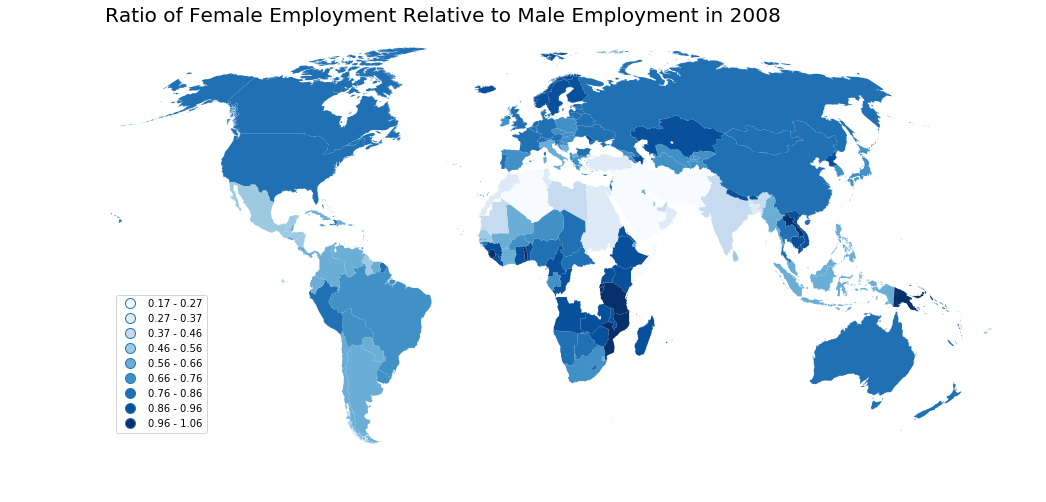

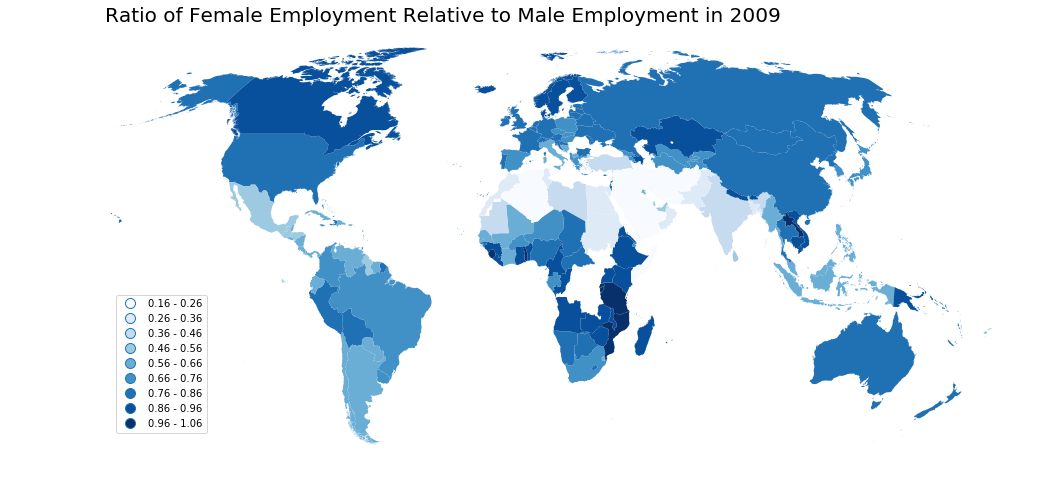

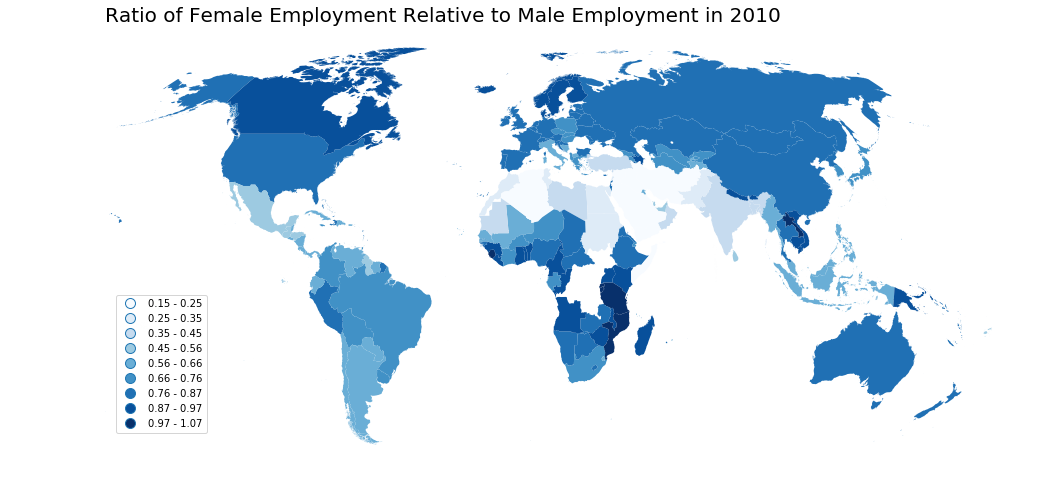

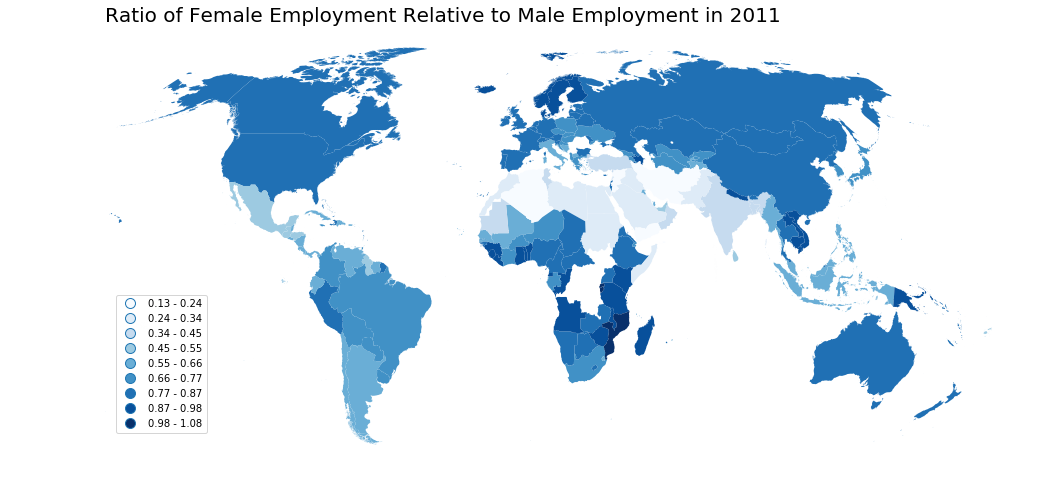

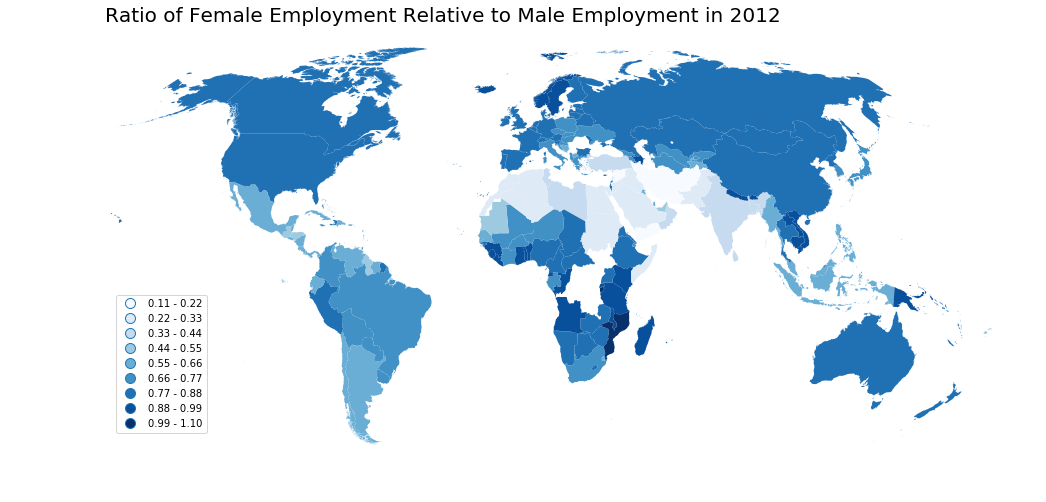

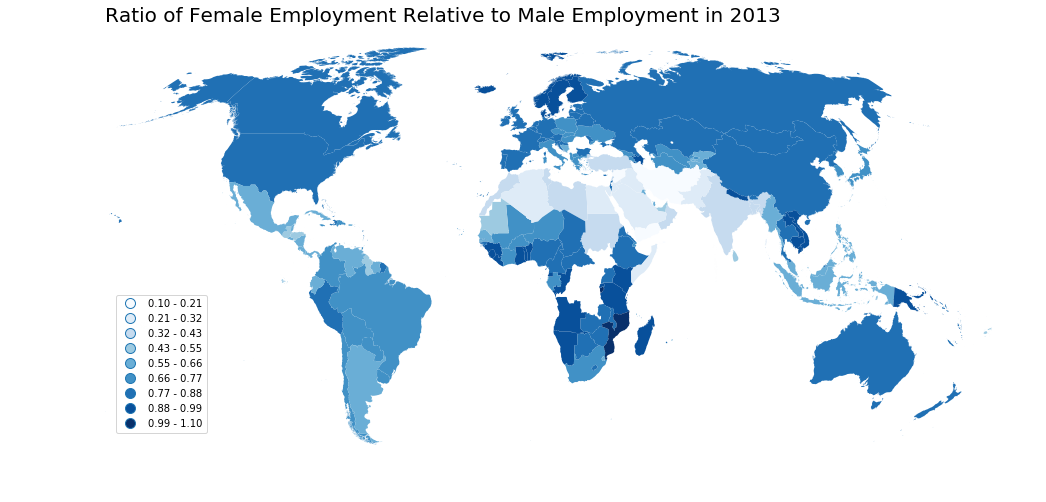

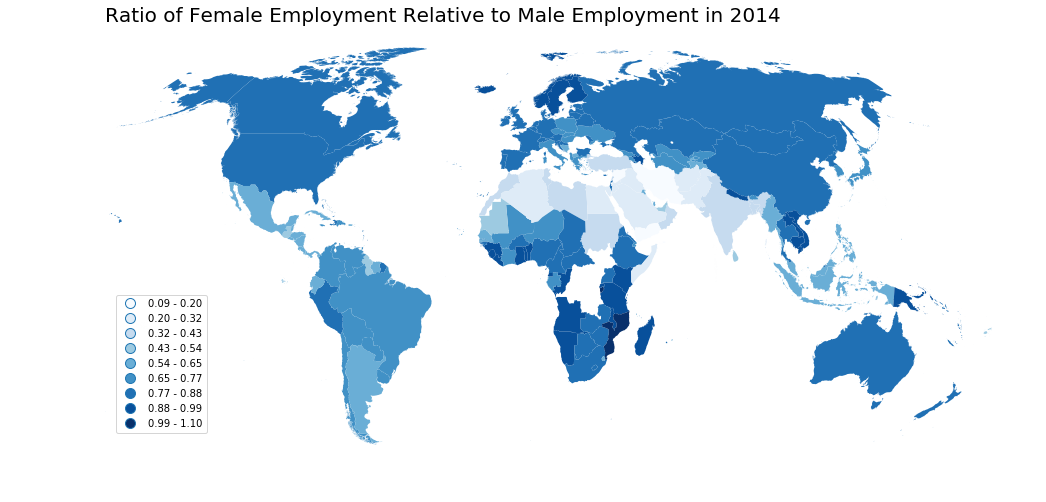

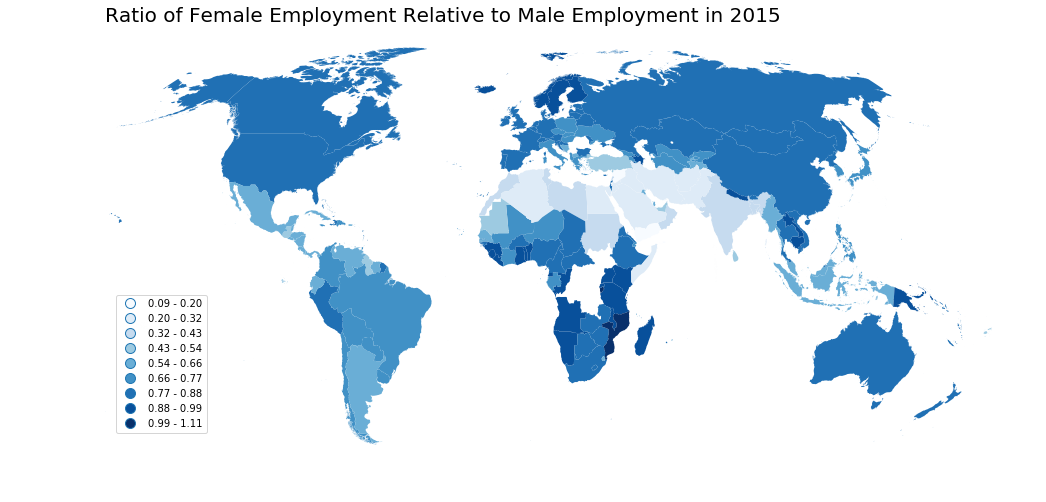

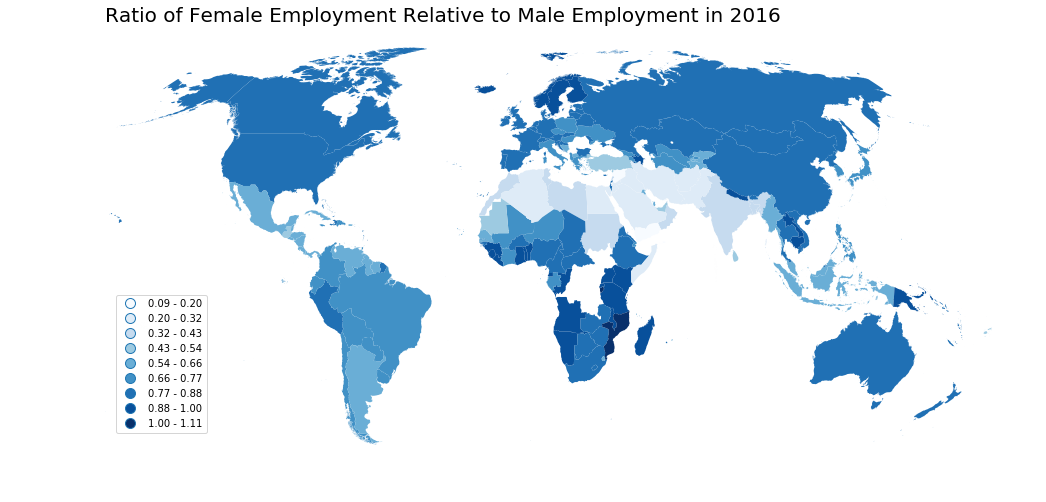

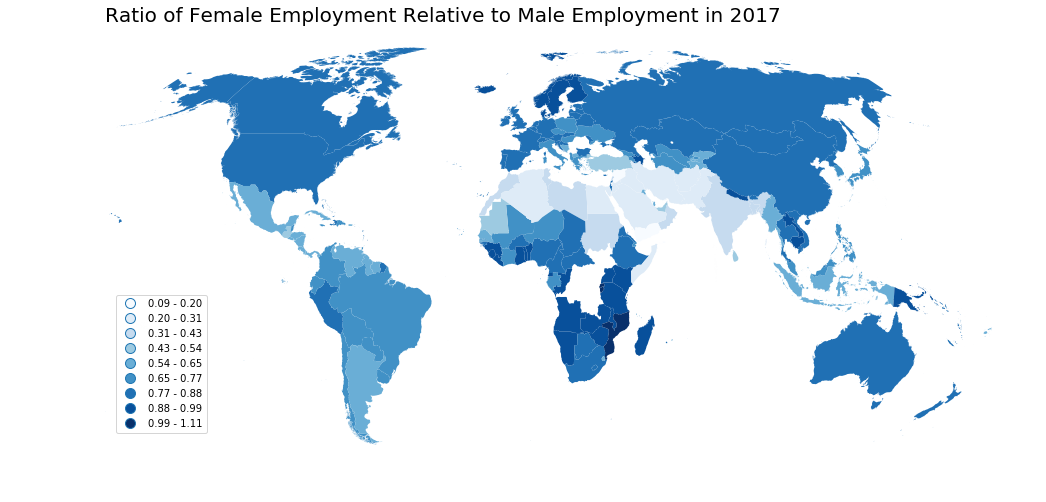

In [27]:
images=[]
for year in labor_df.columns:
    ax = merged.dropna().plot(column=merged[year], cmap=cmap, figsize=figsize, scheme='equal_interval', k=colors, legend=True)
    ax.get_legend().set_bbox_to_anchor((.12, .4))
    ax.set_axis_off()
    ax.set_xlim([-1.5e7, 1.7e7])
    title = 'Ratio of Female Employment Relative to Male Employment in {}'.format(year)
    ax.set_title(title, fontdict={'fontsize': 20}, loc='left')
    #plt.savefig(f'{year}.png')
#     images.append(imageio.imread(ax))
    
